### Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

In [2]:
# Define fine path 
file_path = 'data/world_bank_projects.json'

In [3]:
# Load data as string into a list
with open(file_path) as file:
    data = json.load(file)

In [4]:
# Extract necessary columns from JSON file
df = json_normalize(data, record_path=[['mjtheme_namecode']],
              meta= ['countryname',
                    'project_name'],
              errors = 'ignore')


### Problem 1 -  Find the 10 countries with most projects

In [5]:
# Extract columns from JSON file
df = json_normalize(data, record_path=[['mjtheme_namecode']],
              meta= ['countryname',
                    'project_name'],
              errors = 'ignore')

In [6]:
# Slice DataFrame to address the question in problem-1
# There are Duplicate values in columns Countryname and Projectname
df_projects = df[['project_name','countryname']].drop_duplicates()\
.reset_index(drop=True)

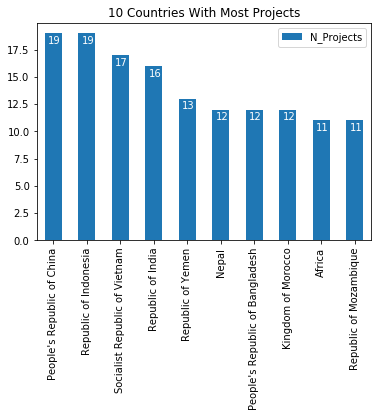

In [7]:
# Determine the Top 10 countries with most porjects
top_tens = df_projects.groupby('countryname')['project_name'].count()\
.sort_values(ascending=False)[:10]

# Create a dataframe and plotting results
top_tens_df = pd.DataFrame(top_tens.values,
                          columns=['N_Projects'],
                          index = top_tens.index)
fig, ax = plt.subplots()
ax = top_tens_df.plot(kind='bar',title = '10 Countries With Most Projects',
                      ax=ax)
ax.set_xlabel('')
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.1, i.get_height()-.95, \
            str(i.get_height()), fontsize=10,
                color='w')

### Problem 2- Find the top 10 major project themes

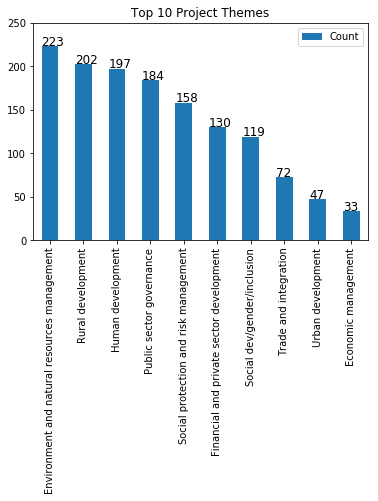

In [8]:
# Extract the necessary columns from df above
df_themes = df.loc[:,['code', 'name']]

# Fill empty cells in column 'name' with np.nan  
df_themes.name.replace('', np.nan, inplace=True)

# Then remove NaN values from name column
df_themes.name.dropna(inplace=True)


# Find top ten project themes
data = { 'Project_Themes': df_themes.name.value_counts()[:10].index,
        'Count': df_themes.name.value_counts()[:10].values}



# Store counts in a dataframe
df_top_ten_themes = pd.DataFrame(data)

# Plot the top ten project themes
fig, ax1 = plt.subplots()
ax1 = df_top_ten_themes.plot(kind='bar',title='Top 10 Project Themes',
                            ax=ax1)
ax1.set_xlabel('') # Won't show x-labels
ax1.set_ylim((0,250)) # Adjusts y axis limits
ax1.set_xticklabels(df_top_ten_themes.Project_Themes)
for i in ax1.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax1.text(i.get_x(), i.get_height()+1, \
            str(i.get_height()), fontsize=12,
                color='k')

### Problem 3 -  Create a dataframe with the missing names filled in

In [20]:
# Create a dictionary having codes for Corresponding project themes
codes = df_themes.code.unique()
mapping = {code : df_themes.name.loc[df_themes.code == code].values[0] for code in codes}
mapping

{'8': 'Human development',
 '11': 'Environment and natural resources management',
 '1': 'Economic management',
 '6': 'Social protection and risk management',
 '5': 'Trade and integration',
 '2': 'Public sector governance',
 '7': 'Social dev/gender/inclusion',
 '4': 'Financial and private sector development',
 '10': 'Rural development',
 '9': 'Urban development',
 '3': 'Rule of law'}

In [21]:
# Use 'mapping' dictionary to map codes to fill empty cells (no name themes)
df_themes['New_Name'] = df_themes['code'].map(mapping)
df_themes.loc[df_themes.name.isnull()].head()

,code,name,New_Name
1,11,NaN,Environment and natural resources management
13,6,NaN,Social protection and risk management
17,8,NaN,Human development
19,7,NaN,Social dev/gender/inclusion
24,2,NaN,Public sector governance
